In [1]:
from multiprocessing import Pool

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from scipy.stats import binomtest

In [2]:
df = pd.read_csv('./data/interim/cor/cohort.merged.table.basic', sep='\t')
df

,CHROM,POS,QD,FS,SOR,MQ,MQRankSum,ReadPosRankSum
0,NC_056572.1,264,27.32,3.468,2.093,54.53,-1.383,0.000
1,NC_056572.1,310,21.79,3.495,1.508,56.31,-0.431,0.431
2,NC_056572.1,410,16.46,0.000,0.655,58.37,-0.210,0.189
3,NC_056572.1,419,19.24,0.000,0.892,58.61,0.000,0.328
4,NC_056572.1,441,24.12,1.243,0.910,57.73,0.319,-0.253
...,...,...,...,...,...,...,...,...
26170809,NC_001606.1,16024,34.70,0.000,0.769,59.66,NaN,NaN
26170810,NC_001606.1,16060,32.88,0.000,0.722,59.81,NaN,NaN
26170811,NC_001606.1,16081,32.25,0.000,0.319,59.97,-0.079,0.664
26170812,NC_001606.1,16156,34.02,0.000,0.787,59.78,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26170814 entries, 0 to 26170813
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   CHROM           object 
 1   POS             int64  
 2   QD              float64
 3   FS              float64
 4   SOR             float64
 5   MQ              float64
 6   MQRankSum       float64
 7   ReadPosRankSum  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.6+ GB


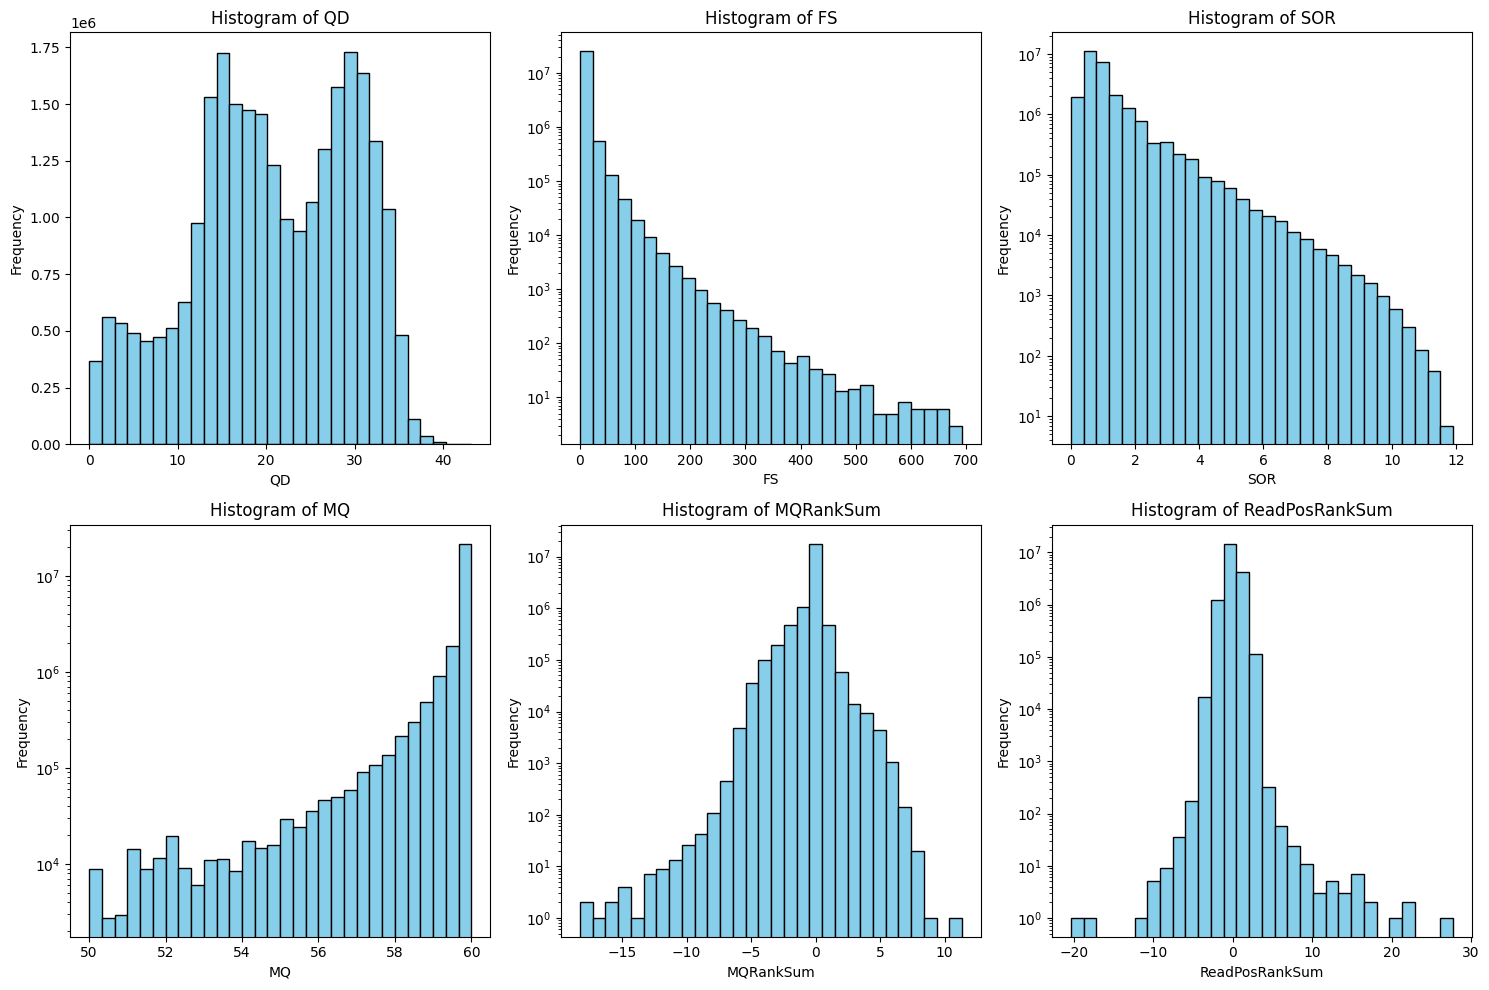

In [15]:
# List of columns to plot
columns = ['QD', 'FS', 'SOR', 'MQ', 'MQRankSum', 'ReadPosRankSum']

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    axes[i].hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    if col != 'QD':
        axes[i].set_yscale('log')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.savefig('./figures/basic_var_params_histograms.pdf')
plt.show()

https://gatk.broadinstitute.org/hc/en-us/articles/360035890471-Hard-filtering-germline-short-variants

Threshholds (save variatns according to filters below):
- QD > 2
- FS < 60
- SOR < 3
- MQ > 50
- -2.5 < MQRankSum < 2.5
- ReadPosRankSum > -8

In [3]:
df[
    (df['QD'] > 2) &
    (df['FS'] < 60) &
    (df['SOR'] < 3) &
    (df['MQ'] > 50) &
    (df['MQRankSum'].between(-5, 5)) &
    (df['ReadPosRankSum'].between(-8, 8))
]

,CHROM,POS,QD,FS,SOR,MQ,MQRankSum,ReadPosRankSum
0,NC_056572.1,264,27.32,3.468,2.093,54.53,-1.383,0.000
1,NC_056572.1,310,21.79,3.495,1.508,56.31,-0.431,0.431
2,NC_056572.1,410,16.46,0.000,0.655,58.37,-0.210,0.189
3,NC_056572.1,419,19.24,0.000,0.892,58.61,0.000,0.328
4,NC_056572.1,441,24.12,1.243,0.910,57.73,0.319,-0.253
...,...,...,...,...,...,...,...,...
26170798,NC_001606.1,14242,33.51,0.000,0.091,59.16,-1.251,0.562
26170799,NC_001606.1,14694,30.36,0.000,0.102,58.84,-0.639,-1.565
26170805,NC_001606.1,15183,35.21,0.000,0.040,55.60,-0.191,0.189
26170808,NC_001606.1,15985,32.79,0.000,0.162,58.92,-0.857,0.339
